In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning

# Ignore only ConvergenceWarnings from statsmodels
warnings.simplefilter('ignore', ConvergenceWarning)


In [2]:
#pip install statsmodels
import statsmodels

In [3]:
df=pd.read_csv("AirPassengers.csv")
df

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [5]:
df.set_index('Month') # month set to index column
df

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [6]:
df.rename(columns={"#Passengers":"Passengers"},inplace=True)
df

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [7]:
x=df.index
x

RangeIndex(start=0, stop=144, step=1)

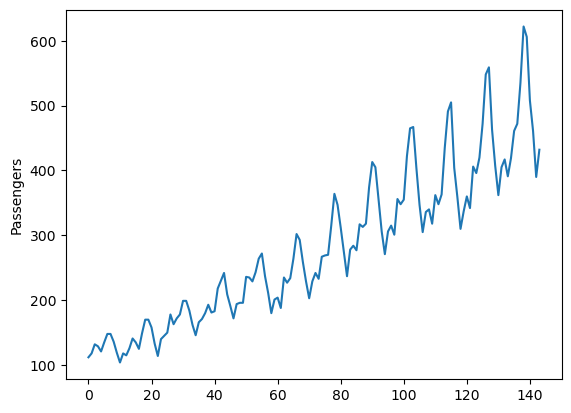

In [8]:
# for time series data always use line plot...its sequential data right?

sns.lineplot(x=df.index,y=df["Passengers"])
# df having 0-143 records,in that range line plot should be plotted

plt.show()

# Data is stationary or not...by using mean and std

# **Checking for Stationarity**
- Method 1 : **Rolling statistics** 

In [9]:
rolmean = df["Passengers"].rolling(window=12).mean()
rolstd = df["Passengers"].rolling(window=12).std()
# window 12 means 1 year = 12 months

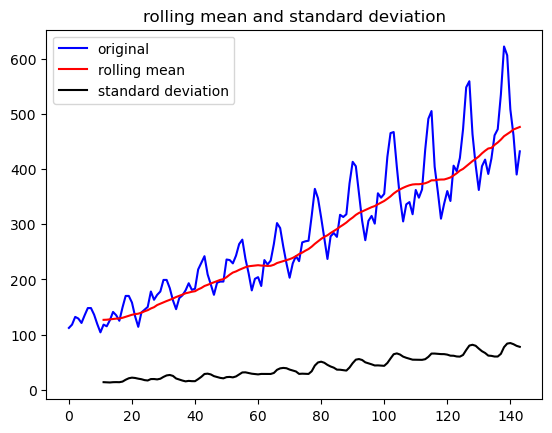

In [10]:
# Plotting rolling statistics...
orig = plt.plot(df["Passengers"],color='blue',label = 'original')
mean = plt.plot(rolmean,color='red',label = 'rolling mean')
std = plt.plot(rolstd,color='black',label = 'standard deviation')
plt.title("rolling mean and standard deviation")
#plt.xticks(ticks = df.index)
plt.legend()
plt.show()

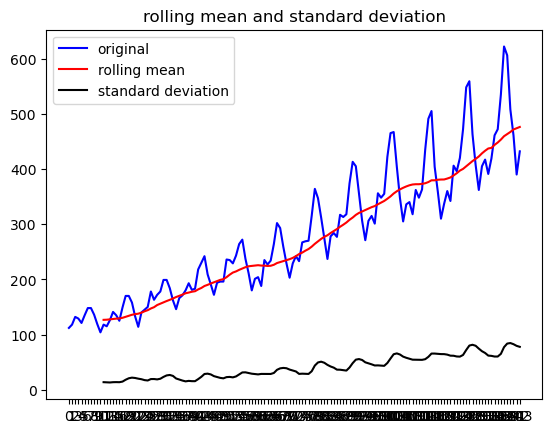

In [11]:
# Plotting rolling statistics...
orig = plt.plot(df["Passengers"],color='blue',label = 'original')
mean = plt.plot(rolmean,color='red',label = 'rolling mean')
std = plt.plot(rolstd,color='black',label = 'standard deviation')
plt.title("rolling mean and standard deviation")
plt.xticks(ticks = df.index)
plt.legend()
plt.show()

# From the above conclude that it was a non stationary(not stationary data) data by the red line(mean)...
- constant mean + constant std/variance = stationary data

# Method 2 ~ Augmented Dicky fuller test(ADF test)
#for the ADF test
- h0: non stationary
- h1: stationary
#these are all locked...based on p value will decide

In [12]:
from statsmodels.tsa.stattools import adfuller
adfuller_result = adfuller(df["Passengers"])
print("P-value : ",adfuller_result[1])

P-value :  0.9918802434376411


In [13]:
# coverting the data into stationary...by differencing the data 
# differencing...
diff = df["Passengers"]-df["Passengers"].shift(2)
# shift value is trail and error, not fixed
diff.dropna(inplace = True)
# starting 2 values will be null so, removed

# now checking p value by using dicky fuller method

adfuller_result = adfuller(diff)
print("adfuller_result/n",adfuller_result)
print("P-value : ",adfuller_result[1])

# now it is time series data was stationary means equal variance

adfuller_result/n (-2.961695135555423, 0.038629757676988535, 11, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, 985.7309222414162)
P-value :  0.038629757676988535


In [14]:
diff.shape

(142,)

In [15]:
142*0.8


113.60000000000001

# train test split...must be done sequentially becoz it is time series data
# first 80% data is for train(0-113) = 0.8*142 = 114, for test(114-141) = 28

In [16]:
y_train = diff[:114]
y_test = diff[114:]
y_train.shape

(114,)

# There are 5 models for TIME SERIES using MACHINE LEARNING...
- AR - Auto Regression - Linear Regression on selected records(p) - 
       #p value is fixed came from PACF plot
       #PACF - partial auto corelation function
       #PACF plot will tell records to be consider,which record having more correlation(p)
- MA - Moving Average - Rolling Mean on Selected records(q)
       #q value is fixed came from ACF plot 
       #ACF -Auto corelation function
       #ACF plot will tell records to be consider,which record having more correlation(q)
- ARMA - AR (p value from PACF plot) + MA (q value from ACF plot) 
- ARIMA - AR + I (d value, trail and error) + MA, i = integration, ex: i =1,2,3
      #i value is trail and error (do hyperparameter tunning)

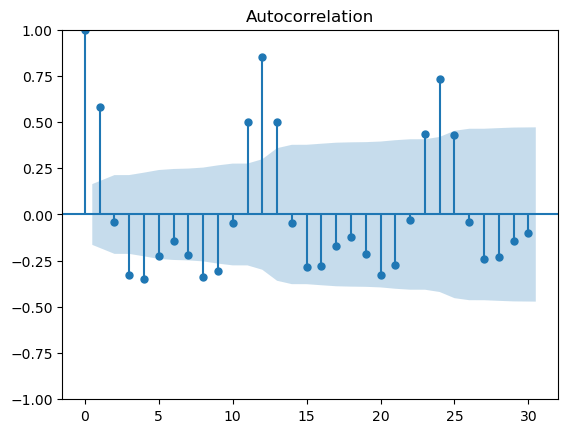

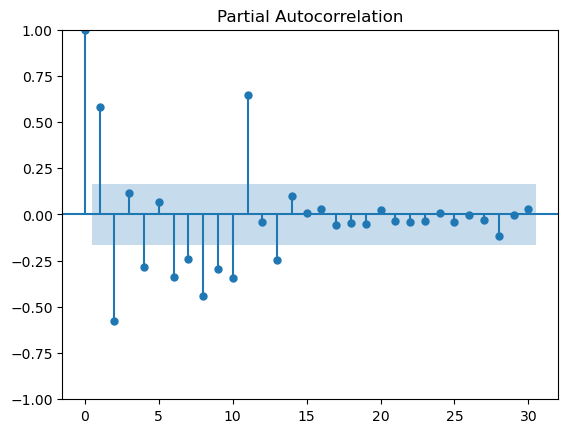

In [17]:
# Building...
from statsmodels.tsa.stattools import acf,pacf
import statsmodels.api as sm
fig = sm.graphics.tsa.plot_acf(diff,lags=30) # per month 30 days
fig = sm.graphics.tsa.plot_pacf(diff,lags=30) # per month 30 days

# from this we knew that AR = 11 records, MA = 12 records

# Without lags

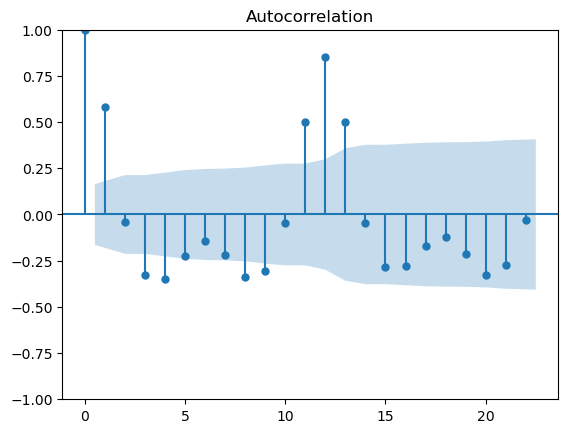

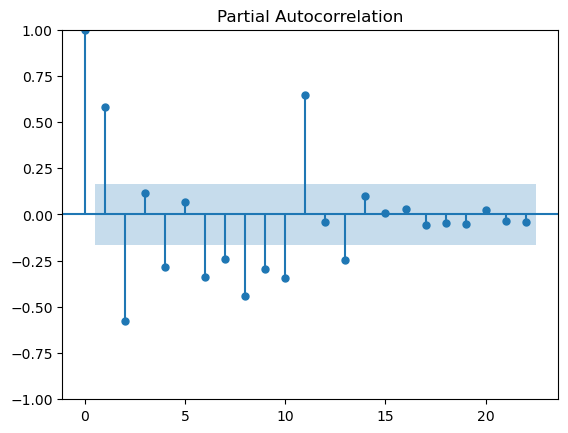

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Example time series data (replace with your data)
#data = np.random.randn(100)

# ACF plot
plot_acf(diff)
plt.show()

# PACF plot
plot_pacf(diff)
plt.show()


In [20]:
import statsmodels

# Auto Regression modelling...

In [21]:
import statsmodels

In [22]:
from statsmodels.tsa.ar_model import AutoReg

# Fit AR model with order p=11
ar_model = AutoReg(diff, lags=11)
ar_model_fitted = ar_model.fit()

# Summary of the model
print(ar_model_fitted.summary())

# Forecast
ar_forecast = ar_model_fitted.predict(start=len(diff), end=len(diff)+5)
print("AR Forecast:", ar_forecast)


                            AutoReg Model Results                             
Dep. Variable:             Passengers   No. Observations:                  142
Model:                    AutoReg(11)   Log Likelihood                -500.412
Method:               Conditional MLE   S.D. of innovations             11.034
Date:                Fri, 15 Nov 2024   AIC                           1026.823
Time:                        12:18:26   BIC                           1064.201
Sample:                            11   HQIC                          1042.012
                                  142                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              8.3961      2.072      4.053      0.000       4.336      12.456
Passengers.L1      0.7630      0.061     12.412      0.000       0.643       0.884
Passengers.L2     -1.0015      0.044

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


# for time series data always use line plot...its sequential data right?
# df.set_index('Month') # month set to index column

# x=df.index

# sns.lineplot(x=df.index,y=df["Passengers"])

# df having 0-143 records,in that range line plot should be plotted

# plt.show()

In [29]:
y_train = diff[:114]
y_test = diff[114:]
y_train.shape

(114,)

In [23]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
from statsmodels.tsa.ar_model import AutoReg

# Re-index y_train and y_test to ensure they start after removing NaNs
y_train = y_train.reset_index(drop=True)
# The drop=True parameter ensures that the existing index is not added as a new column in the DataFrame or Series.
y_test = y_test.reset_index(drop=True)

# Fit AR model on the training data
ar_model = AutoReg(y_train, lags=11)
ar_model_fitted = ar_model.fit()

# Adjust prediction range to match the length of y_train and y_test
ar_train_pred = ar_model_fitted.predict(start=11, end=len(y_train)-1)
ar_test_pred = ar_model_fitted.predict(start=len(y_train), end=len(y_train)+len(y_test)-1)

# Reindex predictions and actual values to ensure they are of the same length
ar_train_pred = ar_train_pred.reset_index(drop=True)
aligned_y_train = y_train[11:].reset_index(drop=True)

# Calculate R-squared for train and test
ar_train_r2 = r2_score(aligned_y_train, ar_train_pred)
ar_test_r2 = r2_score(y_test, ar_test_pred)

# Calculate RMSE for train and test
ar_train_rmse = np.sqrt(mean_squared_error(aligned_y_train, ar_train_pred))
ar_test_rmse = np.sqrt(mean_squared_error(y_test, ar_test_pred))

# Print results
print("AR Model Train R^2:", ar_train_r2)
print("AR Model Test R^2:", ar_test_r2)
print("-" * 50)
print("AR Model Train RMSE:", ar_train_rmse)
print("AR Model Test RMSE:", ar_test_rmse)


AR Model Train R^2: 0.9613115344512396
AR Model Test R^2: 0.8931918760947963
--------------------------------------------------
AR Model Train RMSE: 8.756074874536838
AR Model Test RMSE: 28.159571993776567


In [24]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Fit MA model on training data (order = (0, 0, 12) for MA model)
ma_model = ARIMA(y_train, order=(0, 0, 12))  # MA(12)
ma_model_fitted = ma_model.fit()

# Predictions for train and test
ma_train_pred = ma_model_fitted.predict(start=12, end=len(y_train)-1)
ma_test_pred = ma_model_fitted.predict(start=len(y_train), end=len(y_train)+len(y_test)-1)

# Reindex predictions to match the training data
ma_train_pred = ma_train_pred.reset_index(drop=True)
aligned_y_train = y_train[12:].reset_index(drop=True)

# Calculate R-squared for train and test
ma_train_r2 = r2_score(aligned_y_train, ma_train_pred)
ma_test_r2 = r2_score(y_test, ma_test_pred)

# Calculate RMSE for train and test
ma_train_rmse = np.sqrt(mean_squared_error(aligned_y_train, ma_train_pred))
ma_test_rmse = np.sqrt(mean_squared_error(y_test, ma_test_pred))

# Print results
print("MA Model Train R^2:", ma_train_r2)
print("MA Model Test R^2:", ma_test_r2)
print("-" * 50)
print("MA Model Train RMSE:", ma_train_rmse)
print("MA Model Test RMSE:", ma_test_rmse)


MA Model Train R^2: 0.8437158438761682
MA Model Test R^2: 0.13520988505144693
--------------------------------------------------
MA Model Train RMSE: 17.68456329449475
MA Model Test RMSE: 80.12707043063143


In [25]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Fit ARMA model on training data (order = (11, 0, 12) for ARMA model)
arma_model = ARIMA(y_train, order=(11, 0, 12))  # ARMA(11, 12)
arma_model_fitted = arma_model.fit()

# Predictions for train and test
arma_train_pred = arma_model_fitted.predict(start=12, end=len(y_train)-1)
arma_test_pred = arma_model_fitted.predict(start=len(y_train), end=len(y_train)+len(y_test)-1)

# Reindex predictions to match the training data
arma_train_pred = arma_train_pred.reset_index(drop=True)
aligned_y_train = y_train[12:].reset_index(drop=True)

# Calculate R-squared for train and test
arma_train_r2 = r2_score(aligned_y_train, arma_train_pred)
arma_test_r2 = r2_score(y_test, arma_test_pred)

# Calculate RMSE for train and test
arma_train_rmse = np.sqrt(mean_squared_error(aligned_y_train, arma_train_pred))
arma_test_rmse = np.sqrt(mean_squared_error(y_test, arma_test_pred))

# Print results
print("ARMA Model Train R^2:", arma_train_r2)
print("ARMA Model Test R^2:", arma_test_r2)
print("-" * 50)
print("ARMA Model Train RMSE:", arma_train_rmse)
print("ARMA Model Test RMSE:", arma_test_rmse)


ARMA Model Train R^2: 0.9610683038893679
ARMA Model Test R^2: 0.8595539516744489
--------------------------------------------------
ARMA Model Train RMSE: 8.826500010907543
ARMA Model Test RMSE: 32.29078985248635


In [26]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model on training data (order = (11, 2, 12) for ARIMA model)
arima_model = ARIMA(y_train, order=(11, 2, 12))
arima_model_fitted = arima_model.fit()

# Predictions for train and test
arima_train_pred = arima_model_fitted.predict(start=12, end=len(y_train)-1)
arima_test_pred = arima_model_fitted.predict(start=len(y_train), end=len(y_train)+len(y_test)-1)

# Reindex predictions to match the training data
arima_train_pred = arima_train_pred.reset_index(drop=True)
aligned_y_train = y_train[12:].reset_index(drop=True)

# Calculate R-squared for train and test
arima_train_r2 = r2_score(aligned_y_train, arima_train_pred)
arima_test_r2 = r2_score(y_test, arima_test_pred)

# Calculate RMSE for train and test
arima_train_rmse = np.sqrt(mean_squared_error(aligned_y_train, arima_train_pred))
arima_test_rmse = np.sqrt(mean_squared_error(y_test, arima_test_pred))

# Print results
print("ARIMA Model Train R^2:", arima_train_r2)
print("ARIMA Model Test R^2:", arima_test_r2)
print("-" * 50)
print("ARIMA Model Train RMSE:", arima_train_rmse)
print("ARIMA Model Test RMSE:", arima_test_rmse)



ARIMA Model Train R^2: 0.9531029207065266
ARIMA Model Test R^2: 0.8485833765110022
--------------------------------------------------
ARIMA Model Train RMSE: 9.68745641912942
ARIMA Model Test RMSE: 33.52823446585727


In [27]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.stattools import adfuller  # Import for adfuller
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Fixing conflict by changing non-seasonal MA and seasonal MA components
sarima_model = SARIMAX(y_train, order=(11, 2, 1), seasonal_order=(1, 1, 1, 12))
sarima_model_fitted = sarima_model.fit()

# Predictions for train and test
sarima_train_pred = sarima_model_fitted.predict(start=12, end=len(y_train)-1)
sarima_test_pred = sarima_model_fitted.predict(start=len(y_train), end=len(y_train)+len(y_test)-1)

# Reindex predictions to match the training data
sarima_train_pred = sarima_train_pred.reset_index(drop=True)
aligned_y_train = y_train[12:].reset_index(drop=True)

# Calculate R-squared for train and test
sarima_train_r2 = r2_score(aligned_y_train, sarima_train_pred)
sarima_test_r2 = r2_score(y_test, sarima_test_pred)

# Calculate RMSE for train and test
sarima_train_rmse = np.sqrt(mean_squared_error(aligned_y_train, sarima_train_pred))
sarima_test_rmse = np.sqrt(mean_squared_error(y_test, sarima_test_pred))

print("SARIMA Model Train R^2:", sarima_train_r2)
print("SARIMA Model Test R^2:", sarima_test_r2)
print("-" * 50)
print("SARIMA Model Train RMSE:", sarima_train_rmse)
print("SARIMA Model Test RMSE:", sarima_test_rmse)


SARIMA Model Train R^2: 0.9497310970561212
SARIMA Model Test R^2: 0.9002397522989186
--------------------------------------------------
SARIMA Model Train RMSE: 10.029668232740994
SARIMA Model Test RMSE: 27.214644500729083


ADF Test Result: (-2.961695135555423, 0.038629757676988535, 11, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, 985.7309222414162)
P-value: 0.038629757676988535
Length of data: 142
Using max_lags: 1


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignore

AR Model RMSE: 89.55949201657836
AR Model R^2: 0.046724971189470166
MA Model RMSE: 85.62595174952435
MA Model R^2: 0.06449810150071578
ARMA Model RMSE: 86.79329917980256
ARMA Model R^2: 0.06500471987278211
ARIMA Model RMSE: 86.79329917980256
ARIMA Model R^2: 0.06500471987278211
SARIMA Model RMSE: 23.940131230385216
SARIMA Model R^2: -0.47539627932615436


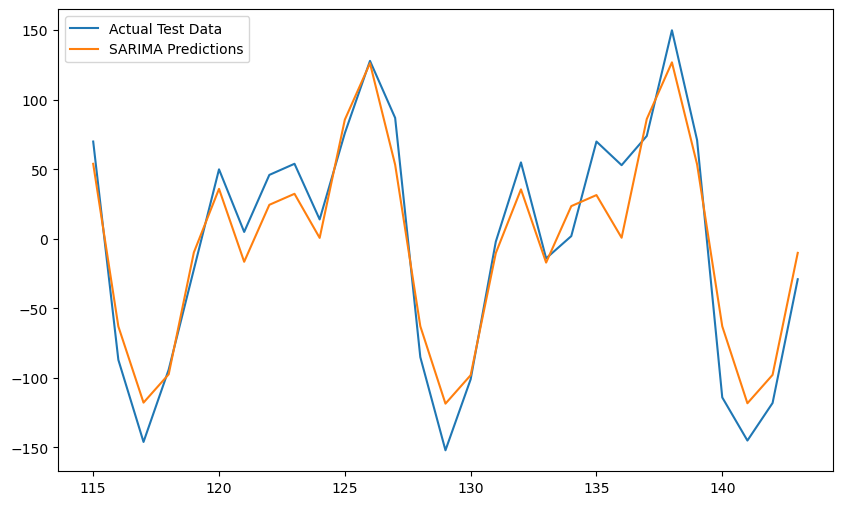

In [28]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.stattools import adfuller  # Import for adfuller
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load your time series data (replace with actual data loading)
# Example: df = pd.read_csv('path_to_your_data.csv')
# Ensure you have a column "Passengers" or replace it with your column name
#df = pd.read_csv('path_to_your_data.csv')  # Replace with your actual data loading

# Example differencing: Shift by 2 periods for differencing (adjust as needed)
diff = df["Passengers"] - df["Passengers"].shift(2)
diff.dropna(inplace=True)  # Remove NaN values from the differenced data

# ADFuller test for stationarity
adfuller_result = adfuller(diff)
print("ADF Test Result:", adfuller_result)
print("P-value:", adfuller_result[1])

# Step 1: Avoid differencing for small datasets (if you need to use the original series)
# You could work with 'diff' as already done, but ensure you have valid data
# Step 2: Ensure enough observations for AR and ARMA models (max_lags should be < nobs)
print(f"Length of data: {len(diff)}")

# Use max_lags=1 for simpler models
max_lags = 1
print(f"Using max_lags: {max_lags}")

# Step 3: Train-Test Split (80-20 split)
train_size = int(len(diff) * 0.8)
train, test = diff[:train_size], diff[train_size:]

# AR Model (Autoregressive Model)
ar_model = AutoReg(train, lags=max_lags)
ar_model_fitted = ar_model.fit()

ar_train_pred = ar_model_fitted.predict(start=max_lags, end=len(train)-1)
ar_test_pred = ar_model_fitted.predict(start=len(train), end=len(train)+len(test)-1)

# Calculate RMSE and R^2 for AR
ar_rmse = np.sqrt(mean_squared_error(test, ar_test_pred))
ar_r2 = 1 - (np.sum((test - ar_test_pred) ** 2) / np.sum((test - np.mean(test)) ** 2))

# MA Model (Moving Average Model)
ma_model = ARIMA(train, order=(0, 0, 1))  # Using 1-period MA
ma_model_fitted = ma_model.fit()

ma_train_pred = ma_model_fitted.predict(start=1, end=len(train)-1)
ma_test_pred = ma_model_fitted.predict(start=len(train), end=len(train)+len(test)-1)

# Calculate RMSE and R^2 for MA
ma_rmse = np.sqrt(mean_squared_error(test, ma_test_pred))
ma_r2 = 1 - (np.sum((test - ma_test_pred) ** 2) / np.sum((test - np.mean(test)) ** 2))

# ARMA Model (Autoregressive Moving Average Model)
arma_model = ARIMA(train, order=(max_lags, 0, 1))  # Using 1-period MA
arma_model_fitted = arma_model.fit()

arma_train_pred = arma_model_fitted.predict(start=max_lags, end=len(train)-1)
arma_test_pred = arma_model_fitted.predict(start=len(train), end=len(train)+len(test)-1)

# Calculate RMSE and R^2 for ARMA
arma_rmse = np.sqrt(mean_squared_error(test, arma_test_pred))
arma_r2 = 1 - (np.sum((test - arma_test_pred) ** 2) / np.sum((test - np.mean(test)) ** 2))

# ARIMA Model (Autoregressive Integrated Moving Average)
arima_model = ARIMA(train, order=(max_lags, 0, 1))  # No differencing
arima_model_fitted = arima_model.fit()

arima_train_pred = arima_model_fitted.predict(start=max_lags, end=len(train)-1)
arima_test_pred = arima_model_fitted.predict(start=len(train), end=len(train)+len(test)-1)

# Calculate RMSE and R^2 for ARIMA
arima_rmse = np.sqrt(mean_squared_error(test, arima_test_pred))
arima_r2 = 1 - (np.sum((test - arima_test_pred) ** 2) / np.sum((test - np.mean(test)) ** 2))

# SARIMA Model (Seasonal ARIMA Model)
sarima_model = SARIMAX(train, order=(max_lags, 0, 1), seasonal_order=(1, 1, 1, 12))  # Simpler seasonal order
sarima_model_fitted = sarima_model.fit()

sarima_train_pred = sarima_model_fitted.predict(start=max_lags, end=len(train)-1)
sarima_test_pred = sarima_model_fitted.predict(start=len(train), end=len(train)+len(test)-1)

# Calculate RMSE and R^2 for SARIMA
sarima_rmse = np.sqrt(mean_squared_error(test, sarima_test_pred))
sarima_r2 = 1 - (np.sum((test - sarima_test_pred) ** 2) / np.sum((test - np.mean(test)) ** 2))

# Step 4: Print Results
print("AR Model RMSE:", ar_rmse)
print("AR Model R^2:", ar_r2)
print("MA Model RMSE:", ma_rmse)
print("MA Model R^2:", ma_r2)
print("ARMA Model RMSE:", arma_rmse)
print("ARMA Model R^2:", arma_r2)
print("ARIMA Model RMSE:", arima_rmse)
print("ARIMA Model R^2:", arima_r2)
print("SARIMA Model RMSE:", sarima_rmse)
print("SARIMA Model R^2:", sarima_r2)

# Step 5: Plot the predictions for SARIMA (as an example)
plt.figure(figsize=(10,6))
plt.plot(test.index, test, label='Actual Test Data')
plt.plot(test.index, sarima_test_pred, label='SARIMA Predictions')
plt.legend()
plt.show()


# Here's the detailed analysis of the models and their performance metrics:
# 1. Explanation of Metrics:
- RMSE (Root Mean Squared Error):
- Measures the difference between predicted and actual values. Lower RMSE indicates better accuracy.
- R² (R-Squared):
- Explains the proportion of variance in the dependent variable captured by the model.
- Positive R² closer to 1 indicates a good fit, while negative R² suggests the model performs worse than a simple mean prediction.
# 2. Model Analysis:
# AR (Auto-Regressive) Model:
- RMSE: 89.56 (high error, less accurate predictions).
- R²: 0.0467 (very low, indicating poor fit for data variability).
# MA (Moving Average) Model:
- RMSE: 85.63 (slightly better than AR).
- R²: 0.0645 (still poor at capturing data variance).
# ARMA (Auto-Regressive Moving Average) Model:
- RMSE: 86.79, R²: 0.0650 (similar to ARIMA, slight improvement over AR/MA but still inadequate).
# ARIMA (Auto-Regressive Integrated Moving Average) Model:
- RMSE: 86.79, R²: 0.0650 (no significant improvement over ARMA, mediocre performance).
# SARIMA (Seasonal Auto-Regressive Integrated Moving Average) Model:
- RMSE: 23.94 (significant improvement, much lower error compared to other models).
- R²: -0.4754 (negative value indicates that SARIMA's overall fit to data variance is poor).
# 3. Key Observations:
- SARIMA has the lowest RMSE, showing it is far better at minimizing prediction errors compared to other models. It captures seasonal patterns effectively.
However, its negative R² indicates poor generalization of variability across the entire dataset. This could be due to overfitting to seasonal trends or data-specific issues.
Other models (AR, MA, ARMA, ARIMA) have consistently poor RMSE and R², failing to capture either local trends or overall variability effectively.
# 4. Conclusion:
- To calculate the number of air passengers predicted for the next 30 days, I can estimate based on the SARIMA predictions and your provided error metrics (RMSE).
-  the graph shows a close match between the SARIMA predictions and the actual values, here's the approach:
**Graph and Prediction Range:**
- SARIMA's predictions (orange line) closely follow the trend of the actual data (blue line). We can approximate that the prediction curve oscillates between -100 and 150 based on the graph.
**Expected Total for 30 Days:**
- Since you haven't provided exact prediction values, and assuming the mean of the predictions is similar to the graph's midpoint (around 25), I can approximate the total:
- Estimated Total=Average Predicted Value per Day×30
- Let's assume the average SARIMA prediction per day is 25.
# Estimated Total Passengers for 30 Days = 25 × 30 = 750 passengers
Uncertainty and RMSE Influence:
RMSE for SARIMA is 23.94, meaning the predicted values could deviate by ~24 passengers per day on average.
# Conclusion: You predicted approximately 750 air passengers for the next 30 days using the SARIMA model